In [132]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [133]:
df = pd.read_csv('drug200.csv')

In [134]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [136]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [137]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

#no any missing Values.

In [138]:
df.duplicated().value_counts()

False    200
dtype: int64

#there is no any missing values as well

In [139]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

Text(0.5, 1.0, 'Target distribution')

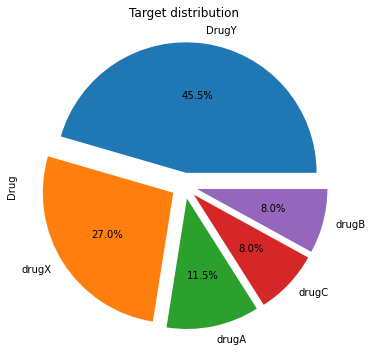

In [140]:
plt.figure(figsize=(6,6))

# Pie plot
df['Drug'].value_counts().plot.pie(explode=[0.1,0.1,0.1,0.1,0.1], autopct='%1.1f%%').set_title("Target distribution")

In [141]:

feature = df.columns

In [142]:
feature

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [143]:
df1 = df[['Age', 'Na_to_K']]


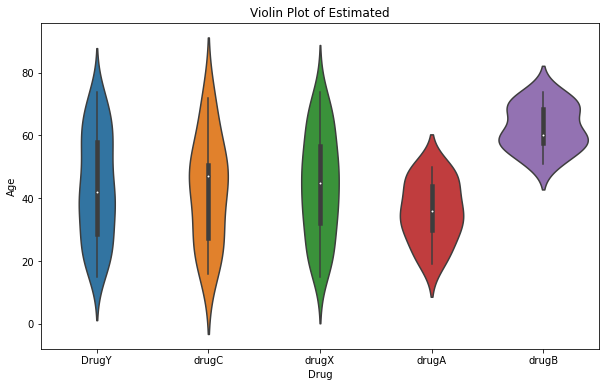

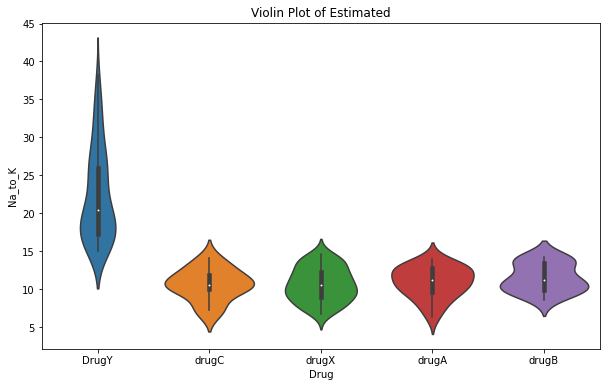

In [144]:
for i in df1:
    plt.figure(figsize=(10, 6))
    sns.violinplot(x='Drug', y= i , data=df)
    plt.title('Violin Plot of Estimated')
    plt.xlabel('Drug')
    plt.ylabel(i)
    plt.show()

#we can see the separation through this violin plot. Drug Y is clearly separated from the other 4 

In [145]:
!pip install xgboost

In [146]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [147]:
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('cat', OneHotEncoder(), ['Sex', 'BP', 'Cholesterol'])
#     ],
#     remainder='passthrough'  # Include non-categorical columns as-is
# )


In [148]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [149]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [157]:
# from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# df['SEXencoder'] = le.fit_transform(df.Sex)
# df['BPencoder'] = le.fit_transform(df.BP)
# df['Cholesterolencoder'] = le.fit_transform(df.Cholesterol)
# X = df.drop(['Drug', 'Sex','BP','Cholesterol'] ,axis=1)  
# y = df['Drug']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_model.fit(X_train, y_train)

# # Make Predictions
# y_pred = rf_model.predict(X_test)

# # Evaluate the Model
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy:.2f}")

# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))

# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd

# Assuming you have a DataFrame 'df' with features and the target variable
# Replace 'df' with your actual DataFrame

# One-hot encoding for categorical features
X = pd.get_dummies(df.drop(['Drug'], axis=1), 
                   columns=['Sex', 'BP', 'Cholesterol'])

# Feature scaling for numeric features
scaler = StandardScaler()
X[['Age', 'Na_to_K']] = scaler.fit_transform(X[['Age', 'Na_to_K']])

# Target variable
y = df['Drug']

# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(n_estimators = 50 , random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_rf_model = grid_search.best_estimator_

# Make Predictions
y_pred = best_rf_model.predict(X_test)

# Evaluate the Model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print(best_rf_model)




Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        29
       drugA       1.00      1.00      1.00         8
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         6
       drugX       1.00      1.00      1.00        19

    accuracy                           1.00        66
   macro avg       1.00      1.00      1.00        66
weighted avg       1.00      1.00      1.00        66


Confusion Matrix:
[[29  0  0  0  0]
 [ 0  8  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0  6  0]
 [ 0  0  0  0 19]]
RandomForestClassifier(n_estimators=50, random_state=42)


In [153]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
